In [7]:
import pandas as pd

#데이터셋 불러오기
df = pd.read_csv("netflix_reviews.csv")

# 데이터셋 크기와 열 정보 출력
print(f"Shape of the dataset: {df.shape}")
print(f"Columns in the dataset: {df.columns}")

Shape of the dataset: (117040, 8)
Columns in the dataset: Index(['reviewId', 'userName', 'content', 'score', 'thumbsUpCount',
       'reviewCreatedVersion', 'at', 'appVersion'],
      dtype='object')


In [16]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# 전처리 함수
def preprocess_text(text):
    if isinstance(text, float):
        return ""
    text = text.lower()  # 대문자를 소문자로
    text = re.sub(r'[^\w\s]', '', text)  # 구두점 제거
    text = re.sub(r'\d+', '', text)  # 숫자 제거
    text = text.strip()  # 띄어쓰기 제외하고 빈 칸 제거
    return text

# 불필요한 열 제거
df = df[['content', 'score']]

# 리뷰 텍스트 정제
df['content'] = df['content'].apply(preprocess_text)

# 평점을 이진 레이블로 변환 (예: 4점 이상은 긍정, 그 외는 부정)
df['sentiment'] = df['score'].apply(lambda x: 1 if x >= 4 else 0)

# 전처리된 데이터 확인
df.head()

,content,score,sentiment
0,very good experience great customer service,5,1
1,bro i was watching w cartoon then this error c...,1,0
2,desent,5,1
3,this is scam company they just loot people mon...,1,0
4,stopped opening ive uninstalled and reinstalle...,1,0


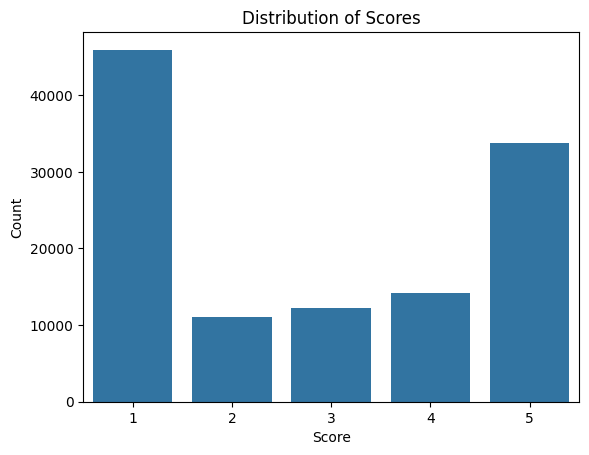

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# 리뷰 점수 분포 확인
sns.countplot(x='score', data=df)
plt.xlabel('Score')
plt.ylabel('Count')
plt.title('Distribution of Scores')
plt.show()